# Практическая работа №1: Исследование двумерного нормального распределения

Выполнил студент гр. 1384 Тапеха Владимир. Вариант №17.

## Цель работы

Исследовать свойства двумерного случайного вектора имеющего нормальное распределение, овладеть навыками преобразования нормального вектора в стандартный и в вектор с независимыми компонентами.

## Основные теоретические положения

Случайный вектор $\overrightarrow\xi = (\xi_1,\dots,\xi_n)^\intercal:\Omega \rightarrow \mathbb{R}^n$ имеет многомерное нормальное распределение, если существует вектор независимых стандартных нормальных случайных величин $\overrightarrow\eta = (\eta_1,\dots,\eta_n)^T$, матрица $\mathbf{A}$ размерности $n \times m$ и вещественный вектор $\overrightarrow{b} = (b_1,\dots,b_n)^\intercal$, такие что: $\overrightarrow{\xi} = \mathbf{A}\overrightarrow{\eta} + \overrightarrow{b}$.

Плотность многомерного невырожденного нормального распределения имеет вид:
$$
    \mathcal{p}_{\overrightarrow{\xi}}(x_1, \dots, x_n) = \frac{1}{(2\pi)^{n/2}\sqrt{\det \Sigma}} \exp(-\frac{1}{2}(\overrightarrow{x}-\overrightarrow{\mu})^T \Sigma^{-1}(\overrightarrow{x}-\overrightarrow{\mu})),
$$

где $\overrightarrow{\mu} = \mathbb{E}\overrightarrow{\xi} = (\mathbb{E}\xi_1, \dots, \mathbb{E}\xi_n)^T$ — вектор математических ожиданий компонент,

$\Sigma = {\sigma_{i,j} = \mathop{\mathrm{cov}}(\xi_i,\xi_j)}_{i,j=1}^n$ — ковариационная матрица.

Свойства многомерного нормального распределения:
- Линейная комбинация случайных переменных, принадлежащих многомерному нормальному распределению, также является нормально распределенной 
- Условные и безусловные распределения, полученные из многомерного нормального распределения, также являются нормально распределенными.
$$
    p_{\xi|\eta = y}(x) = \frac{p_{\xi|\eta}(x, y)}{p_{\eta}(y)}
$$
- Многомерное нормальное распределение устойчиво относительно линейных преобразований. Если $ \overrightarrow\xi \sim \mathcal{N}(\overrightarrow{\mu},\Sigma)$,  $A$ - произвольная матрица размерности $m \times n$, $\overrightarrow{b}$ — произвольный вектор размерности $n \times 1$, то 
$$
A\overrightarrow{\xi}+\overrightarrow{b} \sim \mathcal{N}(A\overrightarrow{\mu}+\overrightarrow{b}, A \Sigma A^T)
$$.


## Постановка задачи

Плотность двумерного нормального распределения имеет вид:
$$
    p_{\xi|\eta}(x, y) = C \cdot \exp(-\frac{1}{2}(3x^2 - 3xy +7y^2 - 3x - 11y + 7))
$$

1. Вычислить вектор математических ожиданий и ковариационные характеристики данного случайного вектора. Построить график плотности распределения $p_{\xi|\eta}$
2. Найти аффинное преобразование, переводящее исходный случайный вектор в стандартный нормальный.
3. Найти ортогональное преобразование, переводящее соответствующий центрированный случайный вектор в вектор с независимыми компонентами. Построить график плотности полученного распределения.
4. Вычислить характеристики совместного распределения случайного вектора $(3\xi + 3\eta, -5\xi + 3\eta)^T$ и записать его плотность. Построить график плотности полученного распределения.
5. Найти условное распределение $\xi$ при условии $\eta$.
Вычислить $\mathbb{E}(\xi|\eta)$ и $\mathbb{D}(\xi|\eta)$.

## Выполнение работы

Импортируем библиотеки.

In [28]:
import numpy as np
import matplotlib.pyplot as plt

#### №1. Вычислить вектор математических ожиданий и ковариационные характеристики данного случайного вектора. Построить график плотности распределения $p_{\xi|\eta}$

$q(x, y) = 3x^2 - 3xy + 7y^2 - 3x - 11y + 7 =$ 

$= 3(x^2 -x(y + 1)) + 7y^2 - 11y + 7 =$ 

$= 3(x^2 - 2x\frac{y + 1}{2} + \frac{(y + 1)^2}{4} - \frac{(y + 1)^2}{4}) + 7y^2 - 11y + 7 =$

$= 3(x - \frac{y + 1}{2})^2 - \frac{3(y + 1)^2}{4} + 7y^2 - 11y + 7 =$ 

$= 3(x - \frac{y}{2} - \frac{1}{2})^2 - \frac{3}{4}(y^2 + 2y + 1) + 7y^2 - 11y + 7 =$ 

$= 3(x - \frac{y}{2} - \frac{1}{2})^2 + \frac{1}{4}(-3y^2 - 6y - 3 + 28y^2 - 44y + 28) =$ 

$= 3(x - \frac{y}{2} - \frac{1}{2})^2 + \frac{1}{4}(25y^2 - 50y + 25) =$

$= 3(x - \frac{y}{2} - \frac{1}{2})^2 + \frac{25}{4}(y^2 - 2y + 1) =$

$= 3(x - \frac{y}{2} - \frac{1}{2})^2 + \frac{25}{4}(y - 1)^2$

Запомним последнеее выражение, оно будет необходимо для аффинного преобразования. 

$q(x, y) = 3(x - 1 - \frac{y}{2} - \frac{1}{2} + 1)^2 + \frac{25}{4}(y - 1)^2 =$

$= 3(x - 1 - \frac{y}{2} + \frac{1}{2})^2 + \frac{25}{4}(y - 1)^2 =$

$= 3(x - 1 - \frac{y}{2} + \frac{1}{2})^2 + \frac{25}{4}(y - 1)^2 =$

$= 3((x - 1) - \frac{1}{2}(y - 1))^2 + \frac{25}{4}(y - 1)^2 =$

$= 3((x - 1)^2 - (y - 1)(x - 1) + \frac{1}{4}(y - 1)^2) + \frac{25}{4}(y - 1)^2 =$

$= 3(x - 1)^2 - 3(y - 1)(x - 1) + \frac{3}{4}(y - 1)^2 + \frac{25}{4}(y - 1)^2 =$

$= 3(x - 1)^2 - 3(y - 1)(x - 1) + 7(y - 1)^2$

Тогда вектор математических ожиданий и ковариационная матрица равны:

$$
\mathbb{E} 
\begin{pmatrix}
    \xi \\
    \eta \\
\end{pmatrix} = \begin{pmatrix}
                    1 \\
                    1 \\
                \end{pmatrix}
$$

$$
\Sigma^{-1} = 
    \begin{pmatrix}
        3 & -\frac{3}{2}\\
        -\frac{3}{2} & 7\\
    \end{pmatrix} 
\Rightarrow 
\Sigma = \frac{4}{75}
    \begin{pmatrix}
        7 & \frac{3}{2}\\
        \frac{3}{2} & 3\\
    \end{pmatrix} 
    = \frac{2}{75}
    \begin{pmatrix}
        14 & 3\\
        3 & 6\\
    \end{pmatrix} 
$$

Найдем дисперсии и ковариацию:

$$
\mathbb{D}\xi = \frac{28}{75},
\mathbb{D}\eta = \frac{4}{25},
\text{cov}(\xi, \eta) = \frac{2}{25}
$$

Найдем коэффициент корреляции:

$$
\rho_{\xi, \eta} = \frac{\text{cov}(\xi, \eta)}{\sqrt{\mathbb{D}\xi \mathbb{D}\eta}} =  \frac{\frac{2}{25}}{\sqrt{\frac{28}{75} \cdot \frac{4}{25}}} = \frac{\sqrt{21}}{14}
$$

Найдем неизвестную C:

$$C = \frac{1}{2\pi \cdot \frac{2}{5\sqrt{3}}} = \frac{5\sqrt{3}}{4\pi} $$

Тогда функция плотность распределения равна: 

$$\mathcal{p}_{\xi,\eta}(x,y) = \frac{5\sqrt{3}}{4\pi} \exp\left\{-\frac{1}{2}\left[\begin{pmatrix} x \\ y \end{pmatrix} - \begin{pmatrix} 1 \\ 1 \end{pmatrix} \right]^\intercal \begin{pmatrix} 3 & -\frac{3}{2} \\ -\frac{3}{2} & 7\end{pmatrix}\left[\begin{pmatrix} x \\ y \end{pmatrix} - \begin{pmatrix} 1 \\ 1 \end{pmatrix} \right]\right\}$$

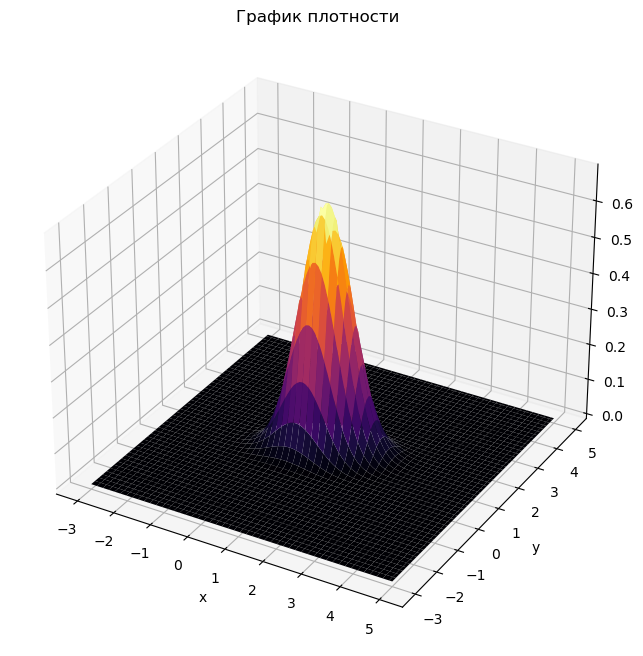

In [29]:
def func(x, y):
    C = 5 * 3**0.5 / (4 * np.pi)
    q = 3*x**2 - 3*x*y + 7*y**2 - 3*x - 11*y + 7
    
    return C * np.exp(-0.5 * q)

x = np.linspace(-3, 5, 100)
y = np.linspace(-3, 5, 100)

X, Y = np.meshgrid(x, y)
Z = func(X, Y)

fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='inferno')

ax.set_title('График плотности')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()


#### №2 Найти аффинное преобразование, переводящее исходный случайный вектор в стандартный нормальный.

Вернемся к прошлым вычислениям:

$q(x, y) = 3(x - \frac{y}{2} - \frac{1}{2})^2 + \frac{25}{4}(y - 1)^2 = $

$= (x\sqrt{3} - \frac{y\sqrt{3}}{2} - \frac{\sqrt{3}}{2})^2 + (\frac{5}{2}y - \frac{5}{2})^2$

Отсюда найдем афинное преобразование, переводящее исходный вектор случайный вектор $\begin{pmatrix} \xi \\ \eta \end{pmatrix}$ в стандартный нормальный $\begin{pmatrix} \xi_{st} \\ \eta_{st} \end{pmatrix}$

$$
    \begin{pmatrix} \xi_{st} \\ \eta_{st} \end{pmatrix} = \begin{pmatrix} \sqrt{3} & -\frac{\sqrt{3}}{2} \\ 0 & \frac{5}{2} \end{pmatrix} \begin{pmatrix} \xi \\ \eta \end{pmatrix} + \begin{pmatrix} 
    -\frac{\sqrt{3}}{2} \\ 
    -\frac{5}{2}
\end{pmatrix}
$$

Проверка.

$$
    \begin{pmatrix} \xi_{st} \\ \eta_{st} \end{pmatrix} = \begin{pmatrix} \sqrt{3} & -\frac{\sqrt{3}}{2} \\ 0 & \frac{5}{2} \end{pmatrix} \begin{pmatrix} 1 \\ 1 \end{pmatrix} + \begin{pmatrix} 
    -\frac{\sqrt{3}}{2} \\ 
    -\frac{5}{2}
\end{pmatrix} = 
\begin{pmatrix}
    \frac{\sqrt{3}}{2} \\
    \frac{5}{2}
\end{pmatrix}
+
\begin{pmatrix}
    -\frac{\sqrt{3}}{2} \\
    -\frac{5}{2}
\end{pmatrix} = \begin{pmatrix}
    0 \\
    0
\end{pmatrix}
$$

$$
\Sigma_{st} = \frac{2}{75}
\begin{pmatrix}
    \sqrt{3} & -\frac{\sqrt{3}}{2} \\
    0 & \frac{5}{2}
\end{pmatrix}
\begin{pmatrix}
    14 & 3 \\
    3 & 6
\end{pmatrix}
\begin{pmatrix}
    \sqrt{3} & 0 \\
    -\frac{\sqrt{3}}{2} & \frac{5}{2}
\end{pmatrix}
= 
\frac{2}{75}
\begin{pmatrix}
    \frac{25\sqrt{3}}{2} & 0 \\
    \frac{15}{2} & 15
\end{pmatrix}
\begin{pmatrix}
    \sqrt{3} & 0 \\
    -\frac{\sqrt{3}}{2} & \frac{5}{2}
\end{pmatrix}
= 
\frac{2}{75}
\begin{pmatrix}
    \frac{75}{2} & 0 \\
    0 & \frac{75}{2}
\end{pmatrix}
= 
\begin{pmatrix}
    1 & 0 \\
    0 & 1
\end{pmatrix}
$$

Видно, что полученное распределение — стандартное нормальное.

#### №3. Найти ортогональное преобразование, переводящее соответствующий центрированный случайный вектор в вектор с независимыми компонентами. Построить график плотности полученного распределения.

Для того, чтобы найти ортогональное преобразование, переводящее соответствующий центрированный случайный ывектор в вектор с независимыми компонентами, необходимо найти собственные векторы $\Sigma^{-1}$.

Найдем собственные числа:

$$
\begin{vmatrix}
    3 - \lambda & -\frac{3}{2} \\
    -\frac{3}{2} & 7 - \lambda
\end{vmatrix} = 0
$$

$
(3 - \lambda)(7 - \lambda) - (-\frac{3}{2}) \cdot (-\frac{3}{2}) = 0
$

$
\lambda^2 - 10\lambda + \frac{75}{4} = 0
$

$
\lambda_1 = \frac{5}{2}, \lambda_2 = \frac{15}{2}
$

Найдем собственные векторы:

$$
\begin{pmatrix}
    \frac{1}{2} & -\frac{3}{2} \\
    -\frac{3}{2} & \frac{9}{2}
\end{pmatrix}
\begin{pmatrix}
    x \\
    y
\end{pmatrix} =
\begin{pmatrix}
    0 \\
    0
\end{pmatrix}
$$

$$
\left(\begin{array}{cc|}
    \frac{1}{2} & -\frac{3}{2} \\ 
    -\frac{3}{2} & \frac{9}{2}
\end{array}
\begin{array}{cc} 
    0 \\
    0 
\end{array}\right)
\sim
\left(\begin{array}{cc|}
    1 & -3 \\ 
    -3 & 9
\end{array}
\begin{array}{cc} 
    0 \\
    0 
\end{array}\right)
\sim
\left(\begin{array}{cc|}
    1 & -3 \\ 
    0 & 0
\end{array}
\begin{array}{cc} 
    0 \\
    0 
\end{array}\right)
\Rightarrow
x = 3y
\Rightarrow
\overrightarrow{v_1} = 
\begin{pmatrix}
    3 \\ 
    1
\end{pmatrix}
$$

$$
\begin{pmatrix}
    -\frac{9}{2} & -\frac{3}{2} \\
    -\frac{3}{2} & -\frac{1}{2}
\end{pmatrix}
\begin{pmatrix}
    x \\
    y
\end{pmatrix} =
\begin{pmatrix}
    0 \\
    0
\end{pmatrix}
$$

$$
\left(\begin{array}{cc|}
    -\frac{9}{2} & -\frac{3}{2} \\
    -\frac{3}{2} & -\frac{1}{2}
\end{array}
\begin{array}{cc} 
    0 \\
    0 
\end{array}\right)
\sim
\left(\begin{array}{cc|}
    9 & 3 \\ 
    3 & 1
\end{array}
\begin{array}{cc} 
    0 \\
    0 
\end{array}\right)
\sim
\left(\begin{array}{cc|}
    0 & 0 \\ 
    3 & 1
\end{array}
\begin{array}{cc} 
    0 \\
    0 
\end{array}\right)
\Rightarrow
3x = -y
\Rightarrow
\overrightarrow{v_2} = 
\begin{pmatrix}
    1 \\ 
    -3
\end{pmatrix}
$$

Нормируем собственные векторы:

$||\overrightarrow{v_1}|| = \sqrt{3^2 + 1} = \sqrt{10}$
$\Rightarrow \overrightarrow{v_{1}^{\prime}} = 
\begin{pmatrix}
    \frac{3}{\sqrt{10}} \\
    \frac{1}{\sqrt{10}}
\end{pmatrix}$

$||\overrightarrow{v_2}|| = \sqrt{1^2 + (-3)^2} = \sqrt{10}$
$\Rightarrow \overrightarrow{v_{2}^{\prime}} = 
\begin{pmatrix}
    \frac{1}{\sqrt{10}} \\
    -\frac{3}{\sqrt{10}}
\end{pmatrix}$

Объединим полученные столбцы в матрицу и получим транспонированную матрицу ортогонального преобразования:

$$
    Q^\intercal = 
    \begin{pmatrix}
    \frac{3}{\sqrt{10}} & \frac{1}{\sqrt{10}} \\
    \frac{1}{\sqrt{10}} & -\frac{3}{\sqrt{10}}
\end{pmatrix} 
\Rightarrow 
Q = 
    \begin{pmatrix}
    \frac{3}{\sqrt{10}} & \frac{1}{\sqrt{10}} \\
    \frac{1}{\sqrt{10}} & -\frac{3}{\sqrt{10}}
\end{pmatrix}
$$

Вычислим характеристики этого распределения и его функцию плотности

$$
    \begin{pmatrix}
        \xi_{ort} \\
        \eta_{ort}
    \end{pmatrix} = 
    \frac{1}{\sqrt{10}}
    \begin{pmatrix}
        3 & 1 \\
        1 & -3
    \end{pmatrix}
    \begin{pmatrix}
        \xi \\
        \eta
    \end{pmatrix}
$$
$$
    \mathbb{E}
    \begin{pmatrix}
        \xi_{ort} \\
        \eta_{ort}
    \end{pmatrix} = 
    \frac{1}{\sqrt{10}}
    \begin{pmatrix}
        3 & 1 \\
        1 & -3
    \end{pmatrix}
    \begin{pmatrix}
        1 \\ 
        1
    \end{pmatrix}
    = \frac{1}{\sqrt{10}}
    \begin{pmatrix}
        4 \\ 
        -2 
    \end{pmatrix}
$$

$$
    \Sigma_{ort} = \frac{2}{750}
    \begin{pmatrix}
        3 & 1 \\
        1 & -3
    \end{pmatrix}
    \begin{pmatrix}
        14 & 3 \\
        3 & 6 \\
    \end{pmatrix} 
    \begin{pmatrix}
        3 & 1 \\
        1 & -3
    \end{pmatrix} =
    \frac{1}{375}
    \begin{pmatrix}
        45 & 15 \\
        5 & -15
    \end{pmatrix}
    \begin{pmatrix}
        3 & 1 \\
        1 & -3 \\
    \end{pmatrix} = 
    \frac{1}{375}
    \begin{pmatrix}
        150 & 0 \\
        0 & 50
    \end{pmatrix} = 
    \begin{pmatrix}
        \frac{2}{5} & 0 \\
        0 & \frac{2}{15}
    \end{pmatrix}
$$

$$
    \Sigma_{ort}^{-1} = 
    \frac{75}{4}
    \begin{pmatrix}
        \frac{2}{5} & 0 \\
        0 & \frac{2}{15}
    \end{pmatrix} = 
    \begin{pmatrix}
        \frac{5}{2} & 0 \\
        0 & \frac{15}{2}
    \end{pmatrix}
$$

$$
\mathbb{D}_{\xi_{ort}} = \frac{2}{5},  
\mathbb{D}_{\eta_{ort}} = \frac{2}{15}, 
cov(\xi_{ort}, \eta_{ort}) = 0, 
\rho(\xi_{ort}, \eta_{ort}) = 0 
$$

$$
C = \frac{1}{2\pi \cdot \frac{2}{5\sqrt{3}}} = \frac{5\sqrt{3}}{4\pi}
$$

$$\mathcal{p}_{\xi_{ort},\eta_{ort}}(x,y) = \frac{5\sqrt{3}}{4\pi} \exp\left\{-\frac{1}{2}\left[\begin{pmatrix} x \\ y \end{pmatrix} - \begin{pmatrix} \frac{4}{\sqrt{10}} \\ -\frac{2}{\sqrt{10}} \end{pmatrix} \right]^\intercal \begin{pmatrix} \frac{5}{2} & 0 \\ 0 & \frac{15}{2}\end{pmatrix}\left[\begin{pmatrix} x \\ y \end{pmatrix} - \begin{pmatrix}\frac{4}{\sqrt{10}} \\ -\frac{2}{\sqrt{10}}\end{pmatrix} \right]\right\}$$

Раскрыв матричное выражение внутри экспоненты, получим: 

$$\mathcal{p}_{\xi_{ort},\eta_{ort}}(x,y) = \frac{5\sqrt{3}}{4\pi} \exp\left(-\frac{1}{2}\left(\frac{5}{2}x^2 - 2\sqrt{10}x + 7 + \frac{15}{2}y^2 + 3\sqrt{10}y\right)\right)$$

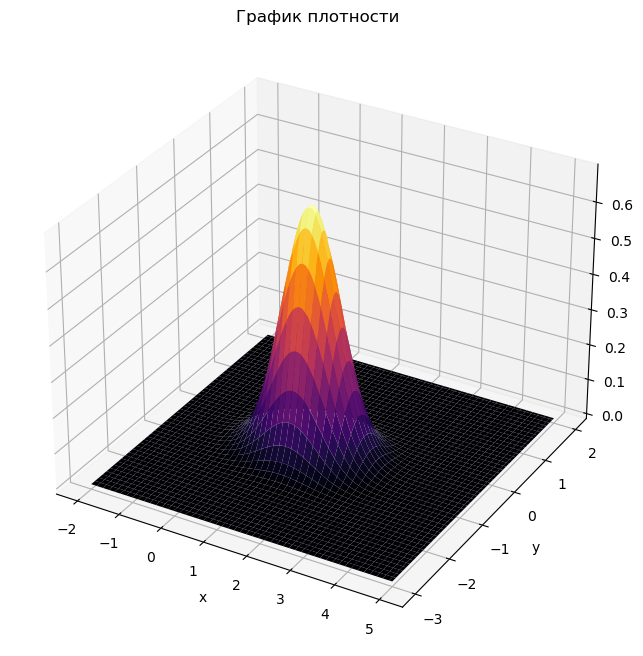

In [55]:
def func(x, y):
    C = 5 * 3**0.5 / (4 * np.pi)
    q = 2.5 * x**2 - 2 * np.sqrt(10) * x + 7 + 7.5 * y**2 + 3 * np.sqrt(10) * y
    
    return C * np.exp(-0.5 * q)

x = np.linspace(-2, 5, 100)
y = np.linspace(-3, 2, 100)

X, Y = np.meshgrid(x, y)
Z = func(X, Y)

fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='inferno')

ax.set_title('График плотности')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()


#### №4. Вычислить характеристики совместного распределения случайного вектора $(3\xi + 3\eta, -5\xi + 3\eta)^T$ и записать его плотность. Построить график плотности полученного распределения.

$A =
\begin{pmatrix} 
    3 & 3 \\ 
    -5 & 3
\end{pmatrix}$ — невырожденная матрица линейного преобразования (det(A) = 24). Найдем характеристики распределения. 

$$
    \begin{pmatrix}
        \xi_{4} \\
        \eta_{4}
    \end{pmatrix} = 
    \begin{pmatrix}
        3 & 3 \\
        -5 & 3
    \end{pmatrix}
    \begin{pmatrix}
        \xi \\
        \eta
    \end{pmatrix}
$$

$$
\mathbb{E}
\begin{pmatrix}
    \xi_4 \\
    \eta_4
\end{pmatrix} = 
\begin{pmatrix}
    3 & 3 \\
    -5 & 3
\end{pmatrix}
\begin{pmatrix}
    1 \\
    1
\end{pmatrix} =
\begin{pmatrix}
    6 \\
    -2 
\end{pmatrix}
$$

$$\Sigma_4 = 
\frac{2}{75}
\begin{pmatrix}
    3 & 3 \\
    -5 & 3
\end{pmatrix}
\begin{pmatrix}
    14 & 3\\
    3 & 6\\
\end{pmatrix} 
\begin{pmatrix}
    3 & 3 \\
    -5 & 3
\end{pmatrix} = 
\frac{2}{75}
\begin{pmatrix}
    51 & 27 \\ 
    -61 & 3
\end{pmatrix}
\begin{pmatrix}
    3 & -5 \\ 
    3 & 3
\end{pmatrix} = 
\frac{1}{75}
\begin{pmatrix}
    117 & -87 \\
    -87 & 157 
\end{pmatrix}
$$

$$\mathbb{D}\xi_4 = \frac{117}{75}, \mathbb{D}\eta_4 = \frac{157}{75}, cov(\xi_4, \eta_4) = -\frac{87}{75}, \rho(\xi_4, \eta_4) = \frac{-\frac{87}{75}}{\sqrt{\frac{117}{75} \cdot \frac{157}{75}}} = -\frac{29\sqrt{2041}}{2041}$$

$$
det\Sigma_4 = \frac{117 \cdot 157 - (-87) \cdot (-87)}{75^2} = \frac{10800}{75^2} = \frac{144}{75}
$$

$$
\Sigma^{-1}_4 = \frac{75}{144} \cdot \frac{1}{75}
\begin{pmatrix}
    157 & 87 \\
    87 & 117 
\end{pmatrix} = 
\begin{pmatrix}
    157 & 87 \\
    87 & 117 
\end{pmatrix} = 
\begin{pmatrix}
    \frac{157}{144} & \frac{29}{48} \\
    \frac{29}{48} & \frac{13}{16} 
\end{pmatrix}
$$

$$C = \frac{1}{2\pi \cdot \frac{12}{5\sqrt{3}}} = \frac{5\sqrt{3}}{24\pi}$$

$$\mathcal{p}_{\xi_{4},\eta_{4}}(x,y) = \frac{5\sqrt{3}}{24\pi} \exp\left\{-\frac{1}{2}\left[\begin{pmatrix} x \\ y \end{pmatrix} - \begin{pmatrix} 6 \\ -2 \end{pmatrix} \right]^\intercal \begin{pmatrix}
    \frac{157}{144} & \frac{29}{48} \\
    \frac{29}{48} & \frac{13}{16} 
\end{pmatrix}\left[\begin{pmatrix} x \\ y \end{pmatrix} - \begin{pmatrix} 6 \\ -2 \end{pmatrix} \right]\right\}$$

Раскрыв матричное выражение внутри экспоненты, получим: 

$$\mathcal{p}_{\xi_{4},\eta_{4}}(x,y) = \frac{5\sqrt{3}}{24\pi} \exp\left(-\frac{1}{2}\left(\frac{157}{144}x^2 - \frac{32}{3}x + 28 + \frac{29}{24}xy - 4y + \frac{13}{16}y^2\right)\right)$$

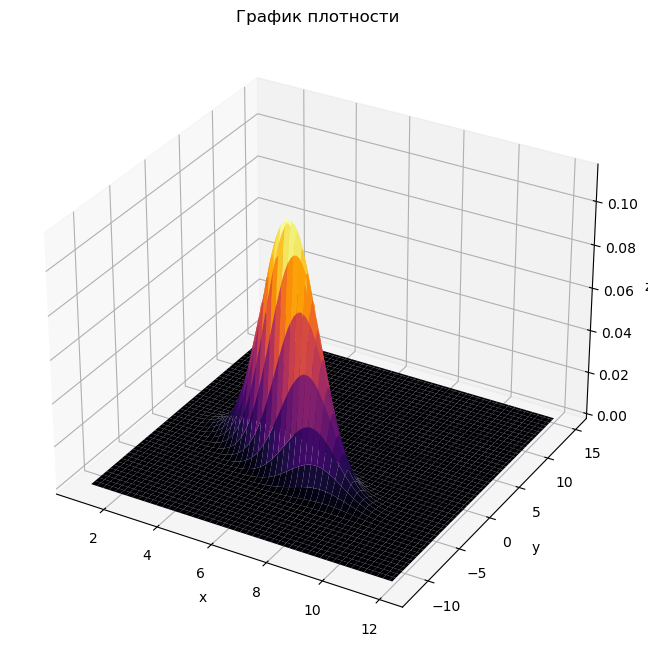

In [68]:
def func(x, y):
    C = 5 * 3**0.5 / (24 * np.pi)
    q = (157/144) * x**2 - (32/3) * x + 28 + (29/24) * x * y - 4 * y + (13/16) * y**2
    
    return C * np.exp(-0.5 * q)

x = np.linspace(1, 12, 100)
y = np.linspace(-12, 15, 100)

X, Y = np.meshgrid(x, y)
Z = func(X, Y)

fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='inferno')

ax.set_title('График плотности')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

#### №5. Найти условное распределение $\xi$ при условии $\eta$. Вычислить $\mathbb{E}(\xi|\eta)$ и $\mathbb{D}(\xi|\eta)$.

Компоненты многомерного нормального распределения имеют одномерное нормальное распределение. Возьмем данные из первого пункта. 

$$p_{\xi|\eta}(x, y) = C \cdot \exp(-\frac{1}{2}(3x^2 - 3xy +7y^2 - 3x - 11y + 7))$$
$$\mathbb{E}\eta = 1, \mathbb{D}\eta = \frac{4}{25}$$

Запишем плотность распределения:

$$\rho_{\eta}(y) = \frac{1}{\sqrt{2\pi \cdot \frac{2}{5}}} exp(-\frac{1}{2}\frac{(y - 1)^2}{\frac{4}{25}}) = \frac{5}{2\sqrt{2\pi}}exp(-\frac{1}{2} \cdot \frac{25}{4}(y^2 - 2y + 1))$$

Найдем плотность условного распределения:


$\displaystyle\rho_{\xi|\eta = y}(x) = \frac{\frac{5\sqrt{3}}{4\pi} \cdot \exp(-\frac{1}{2}(3x^2 - 3xy +7y^2 - 3x - 11y + 7))}{\frac{5}{2\sqrt{2\pi}}exp(-\frac{1}{2} \cdot \frac{25}{4}(y^2 - 2y + 1))} = $

$\displaystyle= \frac{\frac{5\sqrt{3}}{4\pi} \cdot \exp(-\frac{1}{2}(3x^2 - 3xy + 7y^2 - 3x - 11y + 7))}{\frac{5}{2\sqrt{2\pi}}exp(-\frac{1}{2}(\frac{25}{4}y^2 - \frac{25}{2}y + \frac{25}{4}))} = $

$\displaystyle= \frac{\frac{5\sqrt{3}}{4\pi} \cdot \exp(-\frac{1}{2}(3x^2 - 3xy + \frac{3}{4}y^2 - 3x + \frac{3}{2}y + \frac{3}{4}))}{\frac{5}{2\sqrt{2\pi}}} = $

$\displaystyle= \frac{\sqrt{6\pi}}{2\pi} \cdot \exp(-\frac{1}{2}(3x^2 - 3xy + \frac{3}{4}y^2 - 3x + \frac{3}{2}y + \frac{3}{4})) = $

$\displaystyle= \frac{\sqrt{6\pi}}{2\pi} \cdot \exp(-\frac{1}{2} \cdot \frac{3}{4}(4x^2 - 4xy + y^2 - 4x + 2y + 1)) = $

$\displaystyle= \frac{\sqrt{6\pi}}{2\pi} \cdot \exp(-\frac{1}{2} \cdot \frac{3}{4}((2x - y)^2 - 2(2x - y) + 1)) = $

$\displaystyle= \frac{\sqrt{6\pi}}{2\pi} \cdot \exp(-\frac{1}{2} \cdot \frac{3}{4}(2x - (y + 1))^2)$

Тогда математическое ожидание и дисперсия равны:

$$
\mathbb{E}(\xi|\eta = y) = -y - 1, \mathbb{D}(\xi|\eta = y) = \frac{4}{3}
$$

## Вывод

В ходе выполнения практической работы были изучены свойства многомерного случайного вектора имеющего нормальное распределение. Вычислены характеристики исходного случайного вектора. Изучено афинное преобразование, переводящее исходный случайный вектор в стандартный. Было найдено ортогональное преобразование, переводящего соответствующий центрированный случайный вектор в вектор с независимыми компонентами. Были построены графики плотности полученных распределений.